# <font color='red'>
______________________________________________________________________________________________________________________________________________________
### <center> <font color='red'> Masters in Mathematical Finance
##### <center> <font color='red'> 2024 / 25
# <center> <font color='red'> Numerical Methods in Finance
______________________________________________________________________________________________________________________________________________________
### <center> <font color='red'><font> Group:</font>
##### <center> <font color='red'><font> Petr Terletskiy </font>
##### <center> <font color='red'><font> Rodrigo Jesus </font>
##### <center> <font color='red'><font> Tiago Monteiro </font>

______________________________________________________________________________________________________________________________________________________
### <center> <font color='red'><font> Group Project: Nystrom Method for IDEs </font>
______________________________________________________________________________________________________________________________________________________


# **Nystrom Method for Integro-Differential Equations**

Given the functions $f$, $\alpha$, $\beta$ $\in$ $C^0([a, b])$ and $K \in C^0([a, b] \times [a, b])$, we aim to determine a function $y \in C^2[a, b]$ that satisfies the integro-differential equation

<br>

\begin{cases}
y''(x) + \alpha(x)y'(x) + \beta(x)y(x) + \int_a^b K(x,t)y(t) \, dt = f(x), & x \in [a,b]
\\
\\
y(a) = y(b) = 0
\end{cases}

<br>

The Nyström method involves choosing a finite set of points $\{x_1, \cdots, x_n\} \in [a, b]$, at which the equation is naturally verified, obtaining the following semi-discretized equation

<br>

$$
y''(x_i) + \alpha(x_i)y'(x_i) + \beta(x_i)y(x_i) + \int_a^b K(x_i, t) y(t) \, dt = f(x_i), \quad i = 1, \cdots, n
$$

<br>

If we approximate $y'(x_i)$ and $y''(x_i)$ using finite differences, and approximate the integral by a sum of the type

<br>

$$
\int_a^b K(x_i, t) y(t) \, dt \approx \sum_{j=1}^n w_j K(x_i, x_j) y(x_j), \quad i = 1, \cdots, n
$$

<br>

we can obtain the approximate values $y_1, \cdots, y_n$ by solving a linear system.


# Dependencies

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt

# **Exercise (A)**

Create a module in a programming language of your own choosing that, given the interval $[a, b]$, the right-hand side $f$, the coefficients $\alpha$, $\beta$, the kernel $K(x, t)$, and the quadrature rule to be used, provides the numerical solution to the problem.

You can assume that the points are equally spaced, with spacing $h > 0$. One possible choice of the coefficients $w_j$ is given by $w = \left( \frac{h}{2}, h, h, \cdots, h, \frac{h}{2} \right)$.

<br>

**Solution**

Firstly, let us define a function to solve the linear integro-differential equation using the Nyström method with central finite differences and trapezoidal quadrature.

This function will discretize the interval $[a, b]$ into $n$ points, sets up a linear system for interior points (with Dirichlet boundary conditions $y(a) = y(b) = 0$), and it will solve it using NumPy's linear algebra solver.

It will handle the second derivative, coefficient terms $\alpha(x)$ and $\beta(x)$, and integral term with a kernel $K(x,t)$.

In [2]:
def solve_integro_differential(a, b, n, f_func, alpha_func, beta_func, kernel_func):
    """
    Solves the integro-differential equation using Nyström method with finite differences.

    Parameters:
    a, b : float - Interval endpoints, i.e., [a, b]
    n : int - Number of grid points (including endpoints)
    f_func : callable - Right-hand side function f(x)
    alpha_func : callable - Coefficient function α(x)
    beta_func : callable - Coefficient function β(x)
    kernel_func : callable - Kernel function K(x, t)

    Returns:
    x : array - Discretized points (including boundaries)
    y : array - Approximate solution at those points
    """

    # Step size
    h = (b - a) / (n - 1)

    # Discretized points
    x = np.linspace(a, b, n)

    # Quadrature weights
    w = np.full(n, h)
    w[0] = w[-1] = h / 2

    # Initialize solution array (y_1 = y_n = 0)
    y = np.zeros(n)

    # Set up linear system for interior points (i = 2, ..., n-1)
    N = n - 2
    A = np.zeros((N, N))
    rhs = np.zeros(N)

    for i in range(1, n-1):
        xi = x[i]
        # Right-hand side
        rhs[i-1] = f_func(xi)

        # Finite difference and coefficient terms
        if i > 1:
            A[i-1, i-2] = 1 / h**2 - alpha_func(xi) / (2 * h)  # y_{i-1}
        A[i-1, i-1] = -2 / h**2 + beta_func(xi)  # y_i
        if i < n-2:
            A[i-1, i] = 1 / h**2 + alpha_func(xi) / (2 * h)  # y_{i+1}

        # Integral term
        for j in range(n):
            if j == 0 or j == n-1:
                continue  # y_1 = y_n = 0
            A[i-1, j-1] += w[j] * kernel_func(xi, x[j])

    # Solve the linear system
    y_interior = np.linalg.solve(A, rhs)

    # Assign interior solution values
    y[1:-1] = y_interior

    return x, y

Then, let us configure and run the solver for a specific test case with $n = 101$ grid points.

The interval $[0, 1]$, the test functions $f(x) = \sin(\pi x)$, $\alpha(x) = 0$, $\beta(x) = 1$, $K(x,t) = \cos(x-t)$ are defined, and, then, calls the solver to compute the numerical solution

The results are stored in arrays x and y for further analysis.

In [3]:
a, b = 0, 1
n = 101

# Define test functions
def f_func(x):
    return np.sin(np.pi * x)

def alpha_func(x):
    return 0.0

def beta_func(x):
    return 1.0

def kernel_func(x, t):
    return np.cos(x - t)

# Solve
x, y = solve_integro_differential(a, b, n, f_func, alpha_func, beta_func, kernel_func)

In [4]:
# Print a subset of the results
def print_solution(x, y, max_points=len(x)):
    """
    Print a formatted subset of the solution for readability.

    Parameters:
    x : array - discretized points
    y : array - approximate solution
    max_points : int - maximum number of points to display
    """
    print(f"\nNumerical Solution (n = {len(x)} points over [{x[0]:.2f}, {x[-1]:.2f}]):")
    print("-" * 50)
    print(f"{'x':>10} | {'y(x)':>10}")
    print("-" * 50)

    # Select indices to display: first few, middle, last few
    n = len(x)
    if n <= max_points:
        indices = range(n)
    else:
        half = max_points // 2
        indices = list(range(half)) + [n // 2] + list(range(n - half, n))

    for i in indices:
        print(f"{x[i]:>10.3f} | {y[i]:>10.5f}")
    if n > max_points:
        print(f"... (showing {max_points} of {n} points) ...")
    print("-" * 50)

print_solution(x, y, max_points=10)


Numerical Solution (n = 101 points over [0.00, 1.00]):
--------------------------------------------------
         x |       y(x)
--------------------------------------------------
     0.000 |    0.00000
     0.010 |   -0.00394
     0.020 |   -0.00787
     0.030 |   -0.01179
     0.040 |   -0.01569
     0.500 |   -0.12325
     0.960 |   -0.01569
     0.970 |   -0.01179
     0.980 |   -0.00787
     0.990 |   -0.00394
     1.000 |    0.00000
... (showing 10 of 101 points) ...
--------------------------------------------------


Finally, let us visualize the numerical solution for $n = 101$.

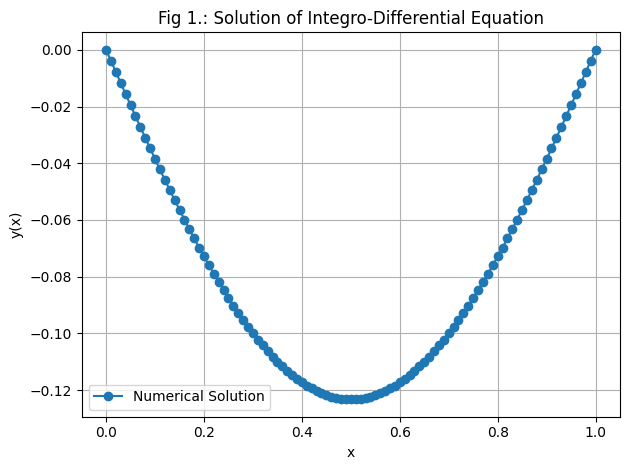

In [5]:
# Plot
plt.plot(x, y, 'o-', label='Numerical Solution')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Fig 1.: Solution of Integro-Differential Equation')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

We will also compare solutions for different grid sizes: $n = 11$ and $n = 401$.

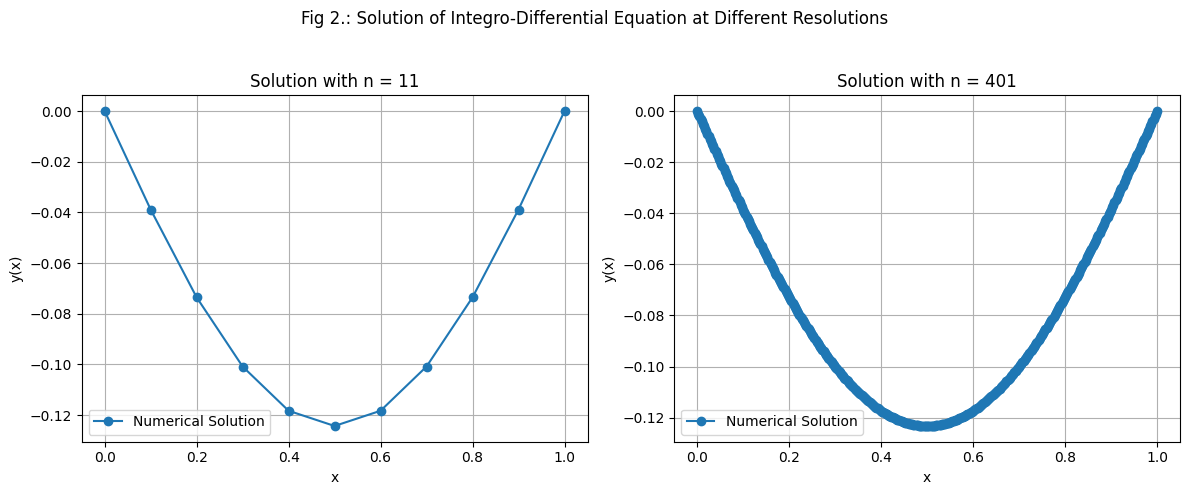

In [6]:
# Solve for n = 11 and n = 401
n_values = [11, 401]
solutions = []

for n in n_values:
    x, y = solve_integro_differential(a, b, n, f_func, alpha_func, beta_func, kernel_func)
    solutions.append((x, y))

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

for i, (x, y) in enumerate(solutions):
    axs[i].plot(x, y, 'o-', label='Numerical Solution')
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('y(x)')
    axs[i].set_title(f'Solution with n = {n_values[i]}')
    axs[i].grid(True)
    axs[i].legend()

fig.suptitle('Fig 2.: Solution of Integro-Differential Equation at Different Resolutions')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# **Exercise (B)**

Obtain a specific example where it is possible to determine the exact solution of the integro-differential equation and use it to test the convergence order of the method for various choices of the finite difference scheme and the quadrature rule.

**Solution**

We will be defining an enhanced function, from Exercise A, to solve a linear integro-differential equation with multiple finite difference schemes and quadrature rules.

The new solver is an extended version of Exercise A's solver. The new one will be supporting central, forward, and backward finite difference schemes and trapezoidal or Simpson’s quadrature rules.

In [7]:
def solve_integro_differential(a, b, n, f_func, alpha_func, beta_func, kernel_func, fd_scheme="central", quad_rule="trapezoidal"):
    h = (b - a) / (n - 1)
    x = np.linspace(a, b, n)

    # Quadrature weights
    if quad_rule == "trapezoidal":
        w = np.full(n, h)
        w[0] = w[-1] = h / 2
    elif quad_rule == "simpson":
        w = np.zeros(n)
        w[0] = w[-1] = h / 3
        for j in range(1, n-1):
            w[j] = (4 * h / 3) if j % 2 == 1 else (2 * h / 3)

    y = np.zeros(n)
    N = n - 2
    A = np.zeros((N, N))
    rhs = np.zeros(N)

    for i in range(1, n-1):
        xi = x[i]
        rhs[i-1] = f_func(xi)

        # Finite difference schemes
        if fd_scheme == "central":
            if i > 1:
                A[i-1, i-2] = 1 / h**2 - alpha_func(xi) / (2 * h)
            A[i-1, i-1] = -2 / h**2 + beta_func(xi)
            if i < n-2:
                A[i-1, i] = 1 / h**2 + alpha_func(xi) / (2 * h)
        elif fd_scheme == "forward":
            if i < n-3:
                A[i-1, i+1] = 1 / h**2
            if i < n-2:
                A[i-1, i] = -2 / h**2 + alpha_func(xi) / h
            A[i-1, i-1] = 1 / h**2 - alpha_func(xi) / h + beta_func(xi)
        elif fd_scheme == "backward":
            A[i-1, i-1] = 1 / h**2 + alpha_func(xi) / h + beta_func(xi)
            if i > 1:
                A[i-1, i-2] = -2 / h**2 - alpha_func(xi) / h
            if i > 2:
                A[i-1, i-3] = 1 / h**2

        # Integral term
        for j in range(n):
            if j == 0 or j == n-1:
                continue
            A[i-1, j-1] += w[j] * kernel_func(xi, x[j])

    y_interior = np.linalg.solve(A, rhs)
    y[1:-1] = y_interior
    return x, y

Now, we will perform a convergence analysis for the solver using a test case with a known exact solution.

A test case on $[0, 1]$ will be defined with exact solution $y(x) = \sin(\pi x)$, and functions $f(x) = -\pi^2 \sin(\pi x) + 2/\pi$, $\alpha(x) = 0$, $\beta(x) = 0$, $K(x,t) = 1$.

It will test multiple grid sizes $(n = 11, 21, 41, 81, 161, 321)$, finite difference schemes, and quadrature rules, computing maximum errors and convergence orders.

In [8]:
ª# Test case
a, b = 0, 1
y_exact = lambda x: np.sin(np.pi * x)
f_func = lambda x: -np.pi**2 * np.sin(np.pi * x) + 2 / np.pi
alpha_func = lambda x: 0.0
beta_func = lambda x: 0.0
kernel_func = lambda x, t: 1.0

# Convergence analysis
n_values = [11, 21, 41, 81, 161, 321]
fd_schemes = ["central", "forward", "backward"]
quad_rules = ["trapezoidal", "simpson"]

# Store results
errors = {qr: {fd: [] for fd in fd_schemes} for qr in quad_rules}
orders = {qr: {fd: [] for fd in fd_schemes} for qr in quad_rules}

for qr in quad_rules:
    for fd in fd_schemes:
        for n in n_values:
            x, y = solve_integro_differential(a, b, n, f_func, alpha_func, beta_func, kernel_func, fd_scheme=fd, quad_rule=qr)
            y_ex = y_exact(x)
            error = np.max(np.abs(y_ex - y))
            errors[qr][fd].append(error)

        # Compute convergence order
        for i in range(len(n_values) - 1):
            n1, n2 = n_values[i], n_values[i+1]
            h1 = (b - a) / (n1 - 1)
            h2 = (b - a) / (n2 - 1)
            e1, e2 = errors[qr][fd][i], errors[qr][fd][i+1]
            if e1 > 0 and e2 > 0:
                alpha = np.log(e1 / e2) / np.log(h1 / h2)
                orders[qr][fd].append(alpha)
            else:
                orders[qr][fd].append(0)

# Print errors and convergence orders
for fd in fd_schemes:
    print(f"\n\n\n=== {fd.upper()} Scheme ===")
    for qr in quad_rules:
        print(f"\nQuadrature Rule: {qr}")

        # Print errors
        print("Errors:")
        print("n".ljust(10) + "Error".ljust(15))
        print("-" * 25)
        for n, error in zip(n_values, errors[qr][fd]):
            print(f"{str(n).ljust(10)}{error:.6e}")

        # Print convergence orders
        print("\nConvergence Orders:")
        print("n".ljust(10) + "Order".ljust(15))
        print("-" * 25)
        for n, order in zip(n_values[1:], orders[qr][fd]):
            print(f"{str(n).ljust(10)}{order:.6f}")




=== CENTRAL Scheme ===

Quadrature Rule: trapezoidal
Errors:
n         Error          
-------------------------
11        8.261869e-03
21        2.058486e-03
41        5.141867e-04
81        1.285195e-04
161       3.212818e-05
321       8.031938e-06

Convergence Orders:
n         Order          
-------------------------
21        2.004884
41        2.001220
81        2.000305
161       2.000076
321       2.000019

Quadrature Rule: simpson
Errors:
n         Error          
-------------------------
11        8.987746e-03
21        2.237722e-03
41        5.588575e-04
81        1.396786e-04
161       3.491742e-05
321       8.729219e-06

Convergence Orders:
n         Order          
-------------------------
21        2.005929
41        2.001478
81        2.000369
161       2.000092
321       2.000023



=== FORWARD Scheme ===

Quadrature Rule: trapezoidal
Errors:
n         Error          
-------------------------
11        2.762797e+00
21        2.621191e+00
41        2.545945e+00
8

Finally, we will be visualizing the convergence analysis results for each finite difference scheme.

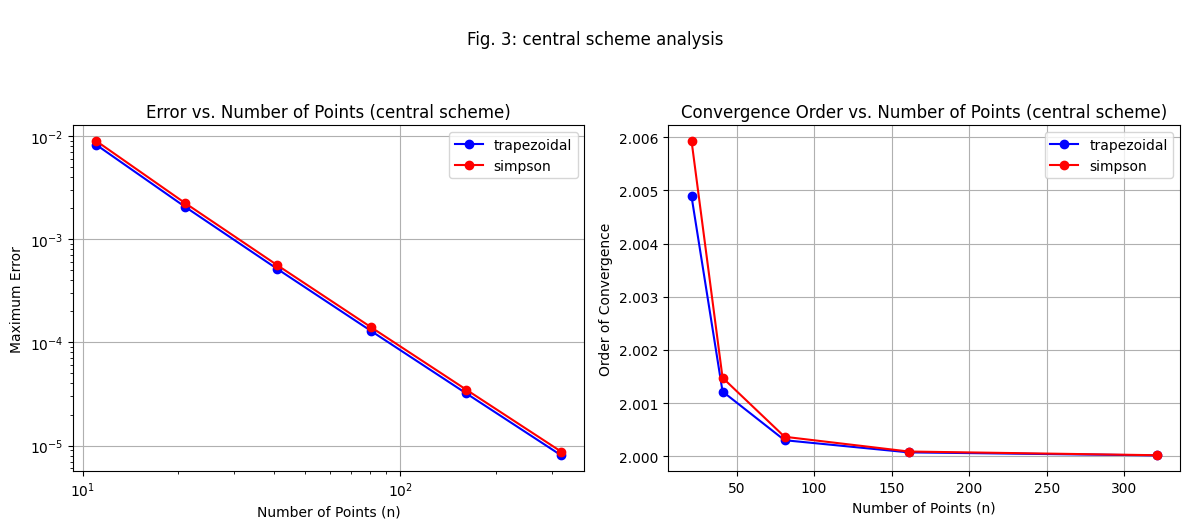

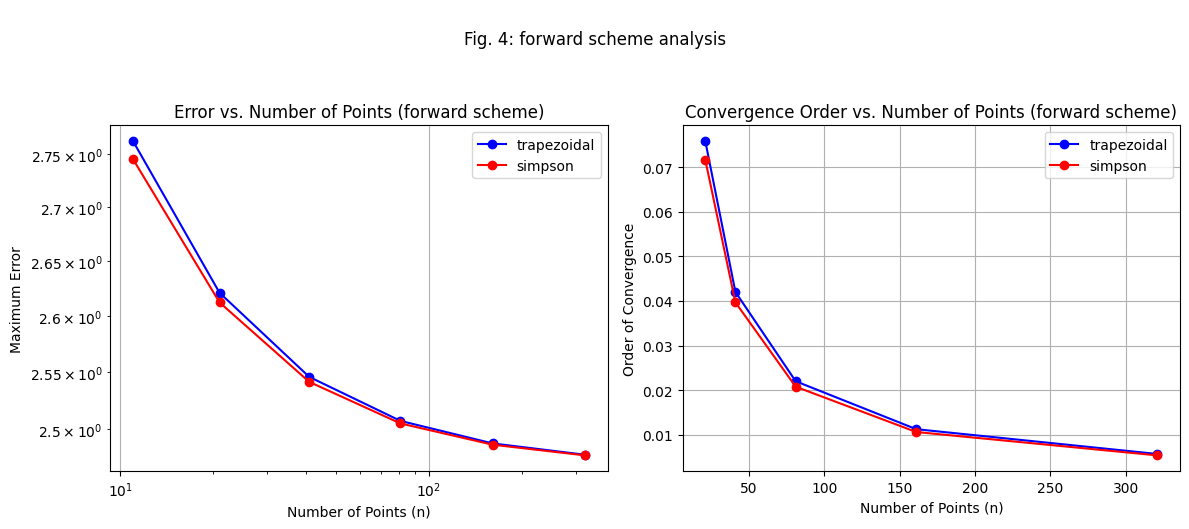

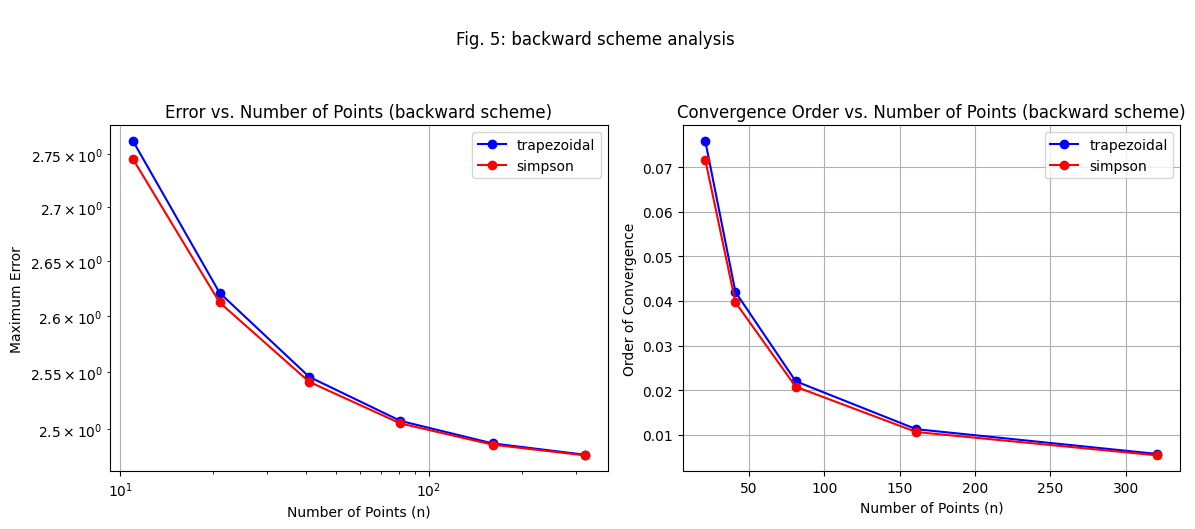

In [9]:

# Plotting for each finite difference scheme
for i, fd in enumerate(fd_schemes):
    plt.figure(figsize=(12, 5))
    plt.suptitle(f'\nFig. {i+3}: {fd} scheme analysis', y=1.05, fontsize=12)

    # Error plot
    plt.subplot(1, 2, 1)
    for qr in quad_rules:
        color = 'blue' if qr == 'trapezoidal' else 'red'
        plt.loglog(n_values, errors[qr][fd], 'o-', color=color, label=f'{qr}')
    plt.xlabel('Number of Points (n)')
    plt.ylabel('Maximum Error')
    plt.title(f'Error vs. Number of Points ({fd} scheme)')
    plt.grid(True)
    plt.legend()

    # Convergence order plot
    plt.subplot(1, 2, 2)
    for qr in quad_rules:
        color = 'blue' if qr == 'trapezoidal' else 'red'
        plt.plot(n_values[1:], orders[qr][fd], 'o-', color=color, label=f'{qr}')
    plt.xlabel('Number of Points (n)')
    plt.ylabel('Order of Convergence')
    plt.title(f'Convergence Order vs. Number of Points ({fd} scheme)')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()

# **Exercise (C)**

Now, assume the kernel, $K$, depends on the unknown $y$, and that $\alpha(x) = \beta(x) = 0$. Write the nonlinear system that must be solved to determine a numerical approximation of the integro-differential equation

<br>

\begin{cases}
y''(x) + \int_{a}^{b} K(x,t,y(t))\,y(t)\,dt = f(x), & x \in \, ]a,b[
\\
\\
y(a) = y(b) = 0
\end{cases}

### **Solution**

We are given the following nonlinear integro-differential boundary value problem:

$$
\begin{cases}
y''(x) + \int_{a}^{b} K(x,t,y(t)) y(t) dt = f(x), & x \in ]a,b[
\\
\\
y(a) = y(b) = 0
\end{cases}
\tag{4}
$$

where the kernel $K(x,t,y)$ is a function of $x$, $t$, and the unknown function $y(t)$.

<br>

Our objective is to derive the nonlinear algebraic system that results from a numerical approximation of this problem, suitable for iterative solution methods like Newton's method.

<br>

#### **1) Discretization of the Domain**

We divide the interval $[a,b]$ into $N$ subintervals of equal length $h = \frac{b - a}{N}.$

This gives $N+1$ the following grid points: $x_i = a + i h, \quad \text{where } i = 0,1,2,\dots,N$.

Let $y_i \approx y(x_i)$ be the numerical approximation to the true solution $y(x)$ at the grid point $x_i$.

<br>

#### **2) Discretization of the Second Derivative**

We approximate the second derivative using the central finite difference formula:

$$
y''(x_i) \approx \frac{y_{i+1} - 2y_i + y_{i-1}}{h^2}.
$$

<br>

This approximation is valid for interior nodes $i = 1,2,\dots,N-1$, where the boundary values $y_0$ and $y_N$ are known from the boundary conditions.

<br>

#### **3) Discretization of the Integral Term**

We approximate the integral term using the composite trapezoidal rule:
$$
\int_a^b K(x_i, t, y(t)) y(t) dt \approx \sum_{j=1}^{N-1} K(x_i, x_j, y_j) y_j w_j.
$$

<br>

 - Here, $w_j$ is the quadrature weight associated with node $x_j$ for the trapezoidal rule:

$$
w_j =
\begin{cases}
\frac{h}{2}, & \text{if } j = 1 \text{ or } j = N-1, \\
h, & \text{otherwise}.
\end{cases}
$$

 - **Note**: we exclude the endpoints $x_0$ and $x_N$ from the sum because $y_0 = y_N = 0$, and hence their contributions to the integral are zero.

<br>

#### **4) Construction of the Nonlinear System**

Putting everything together, for each interior point $x_i$, $i = 1,\dots,N-1$, we obtain the equation:

$$
\frac{y_{i+1} - 2y_i + y_{i-1}}{h^2} + \sum_{j=1}^{N-1} K(x_i, x_j, y_j) y_j w_j = f(x_i).
$$

This represents a system of $N-1$ nonlinear equations in $N-1$ unknowns: $y_1, y_2, \dots, y_{N-1}$. The boundary values $y_0$ and $y_N$ are imposed directly as:

$$
y_0 = y_N = 0.
$$

Thus, the full nonlinear system can be written compactly as:

$$
F_i(y_1, y_2, \dots, y_{N-1}) = \frac{y_{i+1} - 2y_i + y_{i-1}}{h^2} + \sum_{j=1}^{N-1} K(x_i, x_j, y_j) y_j w_j - f(x_i) = 0, \quad i = 1,\dots,N-1.
$$

<br>

#### **5) Remarks on Solution Method**

The system derived above is nonlinear because the kernel $K(x,t,y(t))$ depends on $y(t)$. Therefore, a nonlinear solver is required.

The most common approach is to apply **Newton's method**, which involves iteratively solving linearized systems based on the Jacobian of $F$. This will be the focus of **Exercise (D)**.

<br>

In [10]:
def nmf_integro_differential(a, b, N, K, f, tol=1e-8, max_iter=100):
    """
    Defines the nonlinear system corresponding to the integro-differential equation:
        y''(x) + ∫[a,b] K(x,t,y(t))·y(t) dt = f(x),  with y(a)=y(b)=0
    according to the Nyström method with finite differences and trapezoidal quadrature.

    This function constructs the system F(y) = 0, where y is the vector of interior values.
    Solving this system (e.g., via Newton's method) yields a numerical approximation to the solution.
    """
    # Discretization of the Domain
    h = (b - a) / N
    x = np.array([a + i*h for i in range(N+1)])

    # Initialize solution array with boundary conditions
    y = np.zeros(N+1)

    # Quadrature weights for trapezoidal rule
    w = np.full(N-1, h)
    w[0] = w[-1] = h/2

    # Define the nonlinear system F(y) = 0
    def F(y_interior):
        """System of nonlinear equations"""
        y_full = np.concatenate(([0], y_interior, [0]))

        F_system = np.zeros(N-1)

        for i in range(1, N):  # For each interior point x_i, i=1,...,N-1
            # Finite difference for y''
            y_pp = (y_full[i+1] - 2*y_full[i] + y_full[i-1]) / h**2

            # Integral term
            integral = 0.0
            for j in range(1, N):
                integral += K(x[i], x[j], y_full[j]) * y_full[j] * w[j-1]

            # Complete equation F_i = 0
            F_system[i-1] = y_pp + integral - f(x[i])

        return F_system

    return F, x

# **Exercise (D)**

Taking $a = 0$, $b = 1$, $f(x) = x$ and $K(x,t,y) = \dfrac{e^{x+t}}{1 + y^2}$, obtain numerical approximations of the solution to the equation from **Exercise (C)**, using the Newton method.

<br>

**Problem Statement**

We are tasked with solving a nonlinear integro-differential equation on the interval $[0, 1]$:

<br>
$$
\begin{cases}
y''(x) + \int_0^1 \frac{e^{x + t}}{1 + y(t)^2} y(t) \, dt = x, & x \in (0, 1)
\\
\\
y(0) = y(1) = 0 &
\end{cases}
$$
<br>

This equation is nonlinear due to the dependence of the kernel on the unknown function $y(t)$. We approach this problem numerically using the **Nyström method** combined with **Newton's method** to handle the nonlinearity.

In [11]:
# Parameters
a, b = 0, 1
n = 50
N = n + 1

# Define the specific kernel and f(x) for this problem
def K(x, t, y):
    return np.exp(x + t) / (1 + y**2)

def f(x):
    return x

# Get the residual function F and grid points from nmf_integro_differential
F, x_full = nmf_integro_differential(a, b, N, K, f)
x = x_full[1:-1]

# Jacobian calculation
def jacobian(y, eps=1e-6):
    J = np.zeros((n, n))
    f0 = F(y)
    for j in range(n):
        y_pert = y.copy()
        y_pert[j] += eps
        J[:, j] = (F(y_pert) - f0) / eps
    return J

# Newton solver with improved residual norms output
def newton_solve(y0, tol=1e-8, max_iter=20):
    y = y0.copy()
    # Print header for residual norms table
    print("Newton's Method Convergence")
    print("---------------------------")
    print("Iteration    Residual Norm")
    print("---------------------------")

    for i in range(max_iter):
        r = F(y)
        norm_r = np.linalg.norm(r)
        # Format the iteration and residual norm with fixed width
        print(f"{i:<12} {norm_r:.2e}")
        if norm_r < tol:
            print("---------------------------")
            print(f"Converged in {i+1} iterations!")
            break
        J = jacobian(y)
        delta = np.linalg.solve(J, -r)
        y += delta
        if np.linalg.norm(delta) < tol:
            print("---------------------------")
            print(f"Converged in {i+1} iterations (update norm below tolerance)!")
            break
    else:
        print("---------------------------")
        print("Warning: Newton did not converge within max iterations!")
    return y

# Initial guess
y0 = np.zeros(n)

# Solve and store the solution
y_sol = newton_solve(y0)

# Store x and y for plotting in the next cell
x_for_plot = x
y_for_plot = y_sol

Newton's Method Convergence
---------------------------
Iteration    Residual Norm
---------------------------
0            4.06e+00
1            5.83e-03
2            3.99e-08
---------------------------
Converged in 3 iterations (update norm below tolerance)!


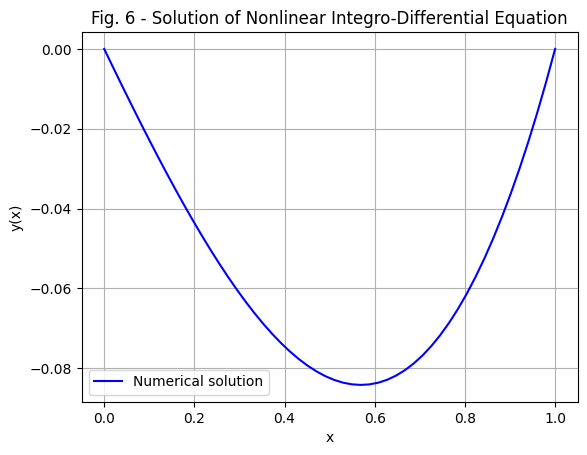

In [12]:
# Retrieve x and y from the previous cell
x = x_for_plot
y_sol = y_for_plot

# Include boundary values for plotting
x_full = np.linspace(a, b, n + 2)
y_full = np.zeros(n + 2)
y_full[1:-1] = y_sol

# Plot
plt.plot(x_full, y_full, label='Numerical solution', color='blue')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Fig. 6 - Solution of Nonlinear Integro-Differential Equation')
plt.grid(True)
plt.legend()
plt.show()